# Sensitivitätsanalyse

Open in Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/opt2025-de/blob/main/03-Graphical-Method/02-Sensitivity.ipynb)

## Bindende Einschränkungen

Im vorherigen Abschnitt haben wir die Lösung des Kaffemischungsproblems mit Hilfe der grafischen Methode gefunden. Die Lösung des Problems lautete $(x^*_1 = 200, x^*_2 = 80)$.
In diesem Produktionsplan verbraucht das Unternehmen

$$
\begin{align*}
0.5 x^*_1 + 0.25 x^*_2 & = 0.5 \cdot 200 + 0.25 \cdot 80 & = 120 \text{ kg Arabica} \\
0.5 x^*_1 + 0.75x^*_2 & = 0.5 \cdot 200 + 0.75 \cdot 80 & = 160 \text{ kg Robusta} \\
0 \cdot x^*_1 + x^*_2 & = 0\cdot 200 + 1\cdot 80 & = 80 \text{ kg Nachfrage nach Deluxe} \\
\end{align*}
$$

Insgesamt verfügt das Unternehmen über 120 kg Arabica, 160 kg Robusta und 150 kg Nachfrage nach Deluxe. Die Ressourcen, die das Optimum bestimmen sind diejenigen, die völlig ausgeschöpft werden. Welche Ressourcen das sind, können wir aus der Grafik leicht erkennen. Der Schnittpunkt zweier Geraden erfüllt beide Gleichungen, die sie definieren.

-  An jedem Punkt der Arabica-Einschränkung gilt, dass 120 kg Arabica verbraucht werden, weil Gleichung \eqref(eq:p-2-constr-brazilian) erfüllt ist.
-  An jedem Punkt der Robusta-Einschränkung gilt, dass 120 kg Robusta verbraucht werden, weil Gleichung \eqref(eq:p-2-constr-cuban) erfüllt ist.
-  An jedem Punkt der Deluxe-Nachfrage-Einschränkung gilt, dass 150 kg Deluxe-Nachfrage verbraucht werden, weil Gleichung \eqref(eq:p-2-constr-demand) erfüllt ist.

Im Optimum bleiben $150 - 80 = 70$ kg ungenutzte Deluxe-Nachfrage.

## Änderung der verfügbaren Ressourcen

- In welchen Grenzen kann die Arabica-Einschränkung geändert werden, ohne den Charakter des optimalen Plans zu ändern (ohne die optimale Basis zu ändern)?
- In welchen Grenzen kann die Robusta-Einschränkung geändert werden, ohne den Charakter des optimalen Plans zu ändern (ohne die optimale Basis zu ändern)?
- In welchen Grenzen kann die Deluxe-Nachfrage-Einschränkung geändert werden, ohne den Charakter des optimalen Plans zu ändern (ohne die optimale Basis zu ändern)?

Um diese Fragen zu beantworten, betrachten wir die Änderung der rechten Seite der Einschränkungen. Die rechte Seite der Arabica-Einschränkung ist 120 kg, die der Robusta-Einschränkung ist 160 kg und die der Deluxe-Nachfrage-Einschränkung ist 80 kg. Wir werden die rechte Seite der Arabica-Einschränkung von 120 kg auf 180 kg erhöhen. Die Änderung der rechten Seite der Robusta-Einschränkung von 160 kg auf 220 kg und die Änderung der rechten Seite der Deluxe-Nachfrage-Einschränkung von 80 kg auf 150 kg.


$$
\begin{align*}
0.5 x_1 + 0.75 x_2 & = 120 \text{ verfügbar 160 кг. (die ursprüngliche Menge)} \\
0.5 x_1 + 0.75 x_2 & = 180 \text{ verfügbar 180 кг.} \\
0.5 x_1 + 0.75 x_2 & = 195 \text{ verfügbar 195 кг.} \\
0.5 x_1 + 0.75 x_2 & = 220 \text{ verfügbar 220 кг.} \\
\end{align*}
$$

In der Grafik entsprechen diese vier Gleichungen vier parallelen Geraden (weil die Koeffizienten vor $x_1$ und $x_2$ die gleichen sind).

Die erste Gerade entspricht der ursprünglichen Robusta-Einschränkung, die zweite der Robusta-Einschränkung mit 180 kg, die dritte der Robusta-Einschränkung mit 195 kg und die vierte der Robusta-Einschränkung mit 220 kg. Die vier Geraden sind in @ig-coffe-restr-var-robusta dargestellt.

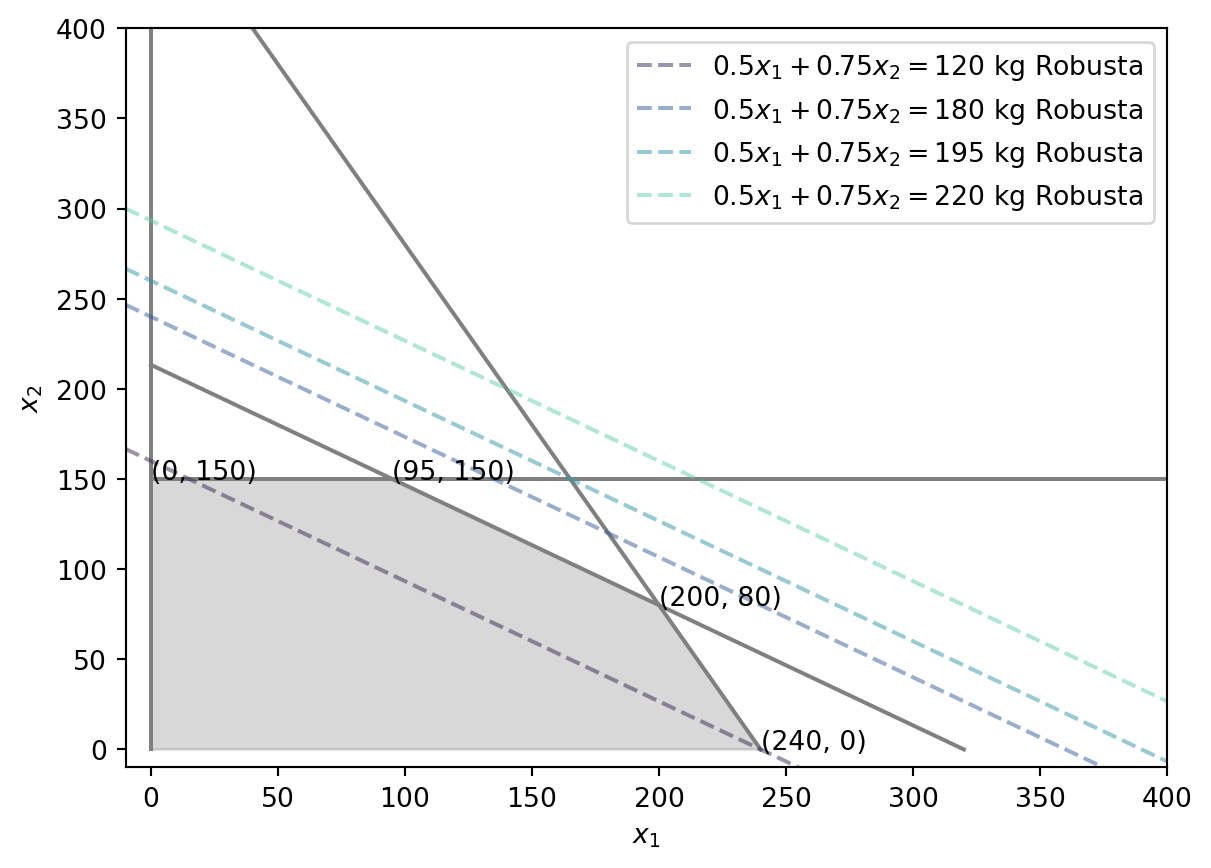

In [1]:
#| label: fig-coffe-restr-var-robusta
#| fig-cap: "Die zulässige Menge für verschiedene Werte der Robusta Verfügbarkeit."
#| fold-code: true

import matplotlib.pyplot as plt
import seaborn as sns

plt.plot([0, 240], [480, 0], color='grey')
plt.plot([0, 320], [213.33, 0], color='grey')
plt.plot([0, 0], [0, 150], color='grey')
plt.plot([0, 400], [150, 150], color='grey')
plt.plot([0, 0], [0, 500], color='grey')

plt.fill([0, 0, 95, 200, 240], [0, 150, 150, 80, 0], color='grey', alpha=0.3)

plt.xlim(-10, 400)
plt.ylim(-10, 400)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

palette = sns.color_palette("mako", n_colors=4).as_hex()

for idx, q in enumerate([120, 180, 195, 220]):
    plt.axline([0, q / 0.75], slope=-0.5/0.75,
               label=fr"$0.5 x_1 + 0.75 x_2 = {q}$ kg Robusta",
               linestyle='--', 
               color=palette[idx],
               alpha=0.5
               )

plt.text(0, 150, f"({0}, {150})")
plt.text(95, 150, f"({95}, {150})")
plt.text(200, 80, f"({200}, {80})")
plt.text(240, 0, f"({240}, {0})")

plt.legend(loc=0)

Aus der Grafik sehen wir, dass bei einer Robusta-Menge von mehr als 195 kg der Charakter des Optimums geändert wird, da die Ressourcen "Arabica" und "Deluxe-Nachfrage" ausgeschöpft werden. Der Unterschied zwischen 195 kg und den ursprünglich verfügbaren 160 kg in der Aufgabe nennen wir zulässige Erhöhung der Ressource (195 - 160 = 35 kg). Das neue Optimum ist der Schnittpunkt von "Arabica" und "Deluxe-Nachfrage". Wir können die Koordinaten dieses Punktes finden, indem wir das System der beiden Gleichungen für die Geraden "Arabica" und "Deluxe-Nachfrage" lösen:

$$
\begin{align*}
0.5 x_1 + 0.25 x_2 & = 120  \\
x_2 & = 150
\end{align*}
$$

Die Lösung des Systems ist $x_1 = 165, x_2 = 150$. Im Gegensatz zu den Optima bei 160 kg und 180 kg Robusta sind diesmal "Arabica" und "Deluxe-Nachfrage" die ausgeschöpften Ressourcen. In diesem Produktionsplan erzielt das Unternehmen einen Gewinn von

$$
z(165, 160) = 40 \cdot 165 + 50 \cdot 150 = 14100.
$$


## Schattenpreise

Die Analyse hat uns bisher eine obere Schranke für die Menge an Robusta gezeigt, die das Unternehmen kaufen kann, ohne den Charakter des optimalen Plans zu verändern. Das waren 195 kg Robusta.

Wir können nun die Gewinne der ursprünglichen Aufgabe ($r^* = 160$ kg Robusta) und der Aufgabe mit $r^{*1} = 195$ kg Robusta vergleichen.

$$
\begin{align*}
z^* & = 12000 \\
z^{*1} & = 14100 \\
\Delta z = z^{*1} - z^* & = 14100 - 12000 = 2100
\end{align*}
$$

Diesen zusätzlichen Gewinn von 2100 € haben wir durch eine zusätzliche Menge von 35 kg Robusta-Kaffee erzielt. Das Verhältnis zwischen dem zusätzlichen Gewinn und der zusätzlichen Ressourcenmenge nennen wir den *Schattenpreis* der Ressource (Robusta):

$$
\frac{\Delta z^*}{\Delta r^*} = \frac{z^{*1} - z^{*}}{r^{*1} - r^{*}} = \frac{14100 - 12000}{195 - 160} = \frac{2100}{35} = 60 [€/kg]
$$

- Die Lieferanten bieten an, zusätzliche 10 kg Robusta zu einem Preis von 20 €/kg zu liefern. Würden Sie dem Unternehmen empfehlen, dieses Angebot anzunehmen?
- Das Unternehmen plant, die Nachfrage nach Deluxe-Kaffee um 20 kg zu erhöhen (z. B. durch Werbung). Würden Sie dem Unternehmen empfehlen, diese Entscheidung zu treffen?
- Ein benachbartes Café bietet an, 10 kg Arabica-Kaffee zu einem Preis von 15 €/kg zu kaufen. Würden Sie dem Unternehmen empfehlen, dieses Angebot anzunehmen?
- Der Manager des Cafés schlägt vor, ein neues Produkt einzuführen, das zu einem Preis von nicht weniger als 6 €/kg verkauft werden kann. Für die Herstellung eines Kilogramms dieses neuen Produkts sind 0,7 kg Arabica und 0,3 kg Robusta erforderlich. Würden Sie dem Unternehmen empfehlen, mit der Produktion zu beginnen?

## Lösung mit `Excel`

Ein Beispiel mit Excel können Sie [hier herunterladen](https://github.com/febse/data/raw/main/opt/Problem_2_coffee_blending.xlsx).
